In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

import sys
import os
sys.path.insert(0, os.path.abspath('../'))
from gropt import spect_phase_contrast
from helper_utils import get_bval, get_moment_plots

In [2]:
import seaborn as sns
def plotter(G, dt, T):
    
    N = G.size
    tt = np.arange(G.size) * dt * 1000
    
    sns.set_style('ticks')
    sns.set_context('talk')
    
    plt.figure()
    plt.plot(tt, G)
    plt.axhline(gmax, color = 'r', linestyle=':')
    plt.axhline(-gmax, color = 'r', linestyle=':')
    plt.axhline(0, color = '0.5', linestyle=':')
    plt.title('G')
    sns.despine()
    plt.tight_layout()
    
    plt.figure()
    plt.plot(tt[:-1], np.diff(G)/dt)
    plt.axhline(smax, color = 'r', linestyle=':')
    plt.axhline(-smax, color = 'r', linestyle=':')
    plt.axhline(0, color = '0.5', linestyle=':')
    plt.title('Slew')
    sns.despine()
    plt.tight_layout()
    
    mm = get_moment_plots(G, T, dt)
    plt.figure()
    for i in range(3):
        plt.plot(tt, mm[i]/np.abs(mm[i]).max(), label = '%d' % i)
    plt.axhline(0, color = '0.5', linestyle=':')
    plt.title('Moments')
    plt.legend()
    sns.despine()
    plt.tight_layout()
    
    Neddy = 200
    max_lam = 100
    all_lam = (np.arange(Neddy) * max_lam/Neddy + 1e-4) * 1e-3
    
    A = []
    for lam in all_lam:
        r = np.diff(np.exp(-np.arange(N+1)*dt/lam))[::-1]
        A.append(r)
        
    AG = A@G
    if AG[1] < 0:
        AG *= -1.0

    plt.figure()
    plt.plot(all_lam * 1e3, AG)
    plt.title("Eddy Spectrum")
    plt.axhline(0, color = '0.5', linestyle=':')
    sns.despine()
    plt.tight_layout()
    
    return AG
    
    

In [3]:
dt = 10e-6
gmax = .08
smax = 100.0

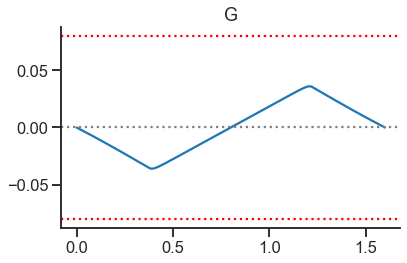

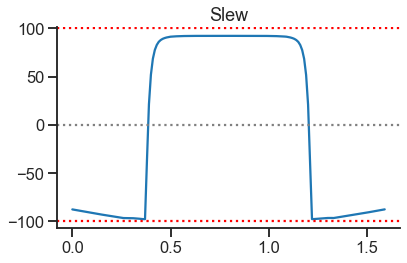

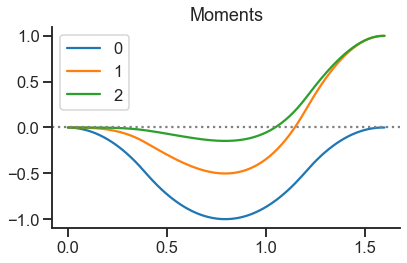

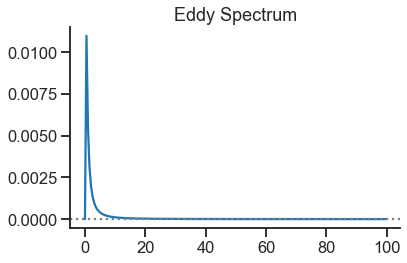

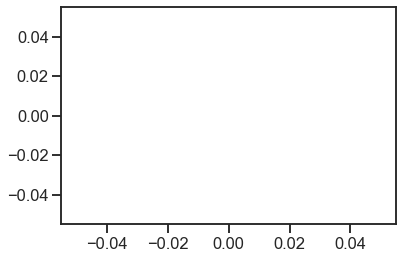

In [4]:
T = 1.6e-3
Neddy = -1
G, dd, ES = spect_phase_contrast(dt, T, gmax, smax, Neddy)
if dd[0] == 0:
    print('NOT FEASIBLE')
    
AG0 = plotter(G, dt, T)
plt.figure()
plt.plot(ES)

1.0817348281166612


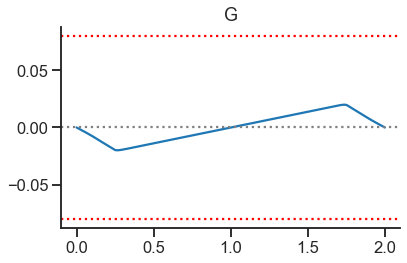

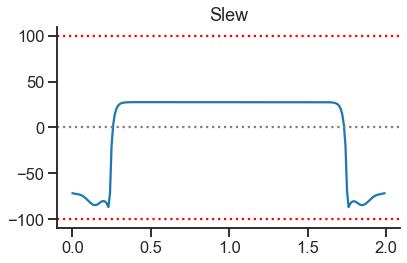

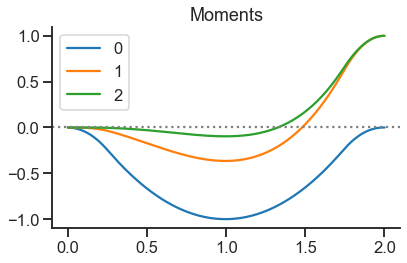

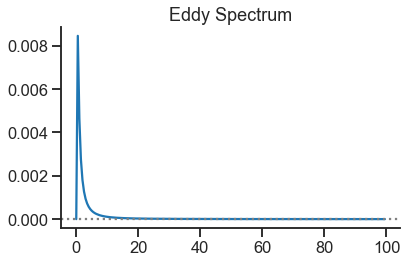

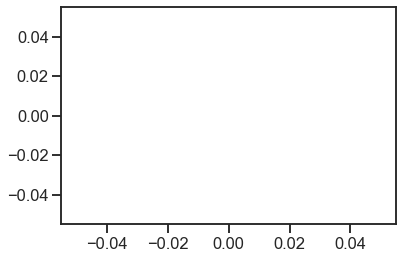

In [5]:
T = 2.0e-3
Neddy = -1
G, dd, ES = spect_phase_contrast(dt, T, gmax, smax, Neddy)
if dd[0] == 0:
    print('NOT FEASIBLE')
    
AG = plotter(G, dt, T)
plt.figure()
plt.plot(ES)

print(10000*(AG**2.0).sum())

500
0.0032445091217330546


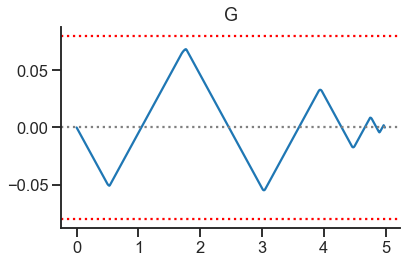

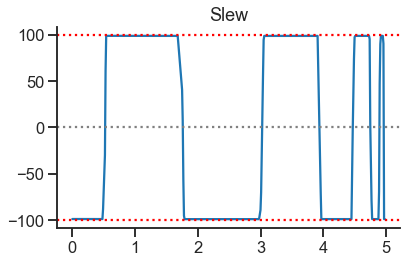

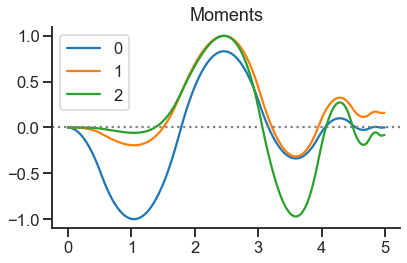

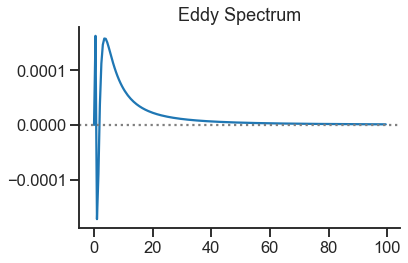

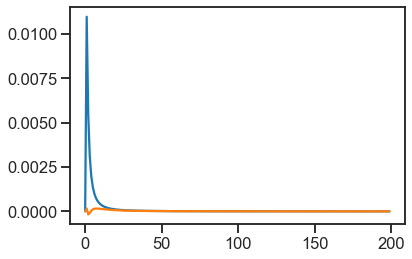

In [9]:
T = 5.0e-3
Neddy = 200
G, dd, ES = spect_phase_contrast(dt, T, gmax, smax, Neddy)
if dd[0] == 0:
    print('NOT FEASIBLE')
    
AG = plotter(G, dt, T)

plt.figure()
plt.plot(AG0)
plt.plot(AG)


print(G.size)

print(10000*(AG**2.0).sum())

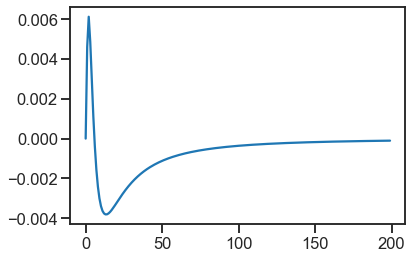

In [7]:
plt.plot(AG+ES)

In [8]:
G.size

201